<h1 align="center"><B>DATA CLEANING</B></h1>

**Problem Statement:**

  The provided dataset contains inconsistencies, errors, missing values, and duplicates, making it unsuitable for analysis in its current state. My task is to systematically clean and preprocess this dataset to ensure its accuracy, completeness, and reliability.


**Aim:**

  The aim of this assignment is to systematically clean and preprocess the given messy dataset to ensure its suitability for further analysis. This involves identifying and rectifying inconsistencies, handling missing values, removing duplicates, correcting errors, and standardizing data formats. By the end of this task, the dataset will be transformed into a clean, reliable, and structured format, ready for accurate and meaningful analysis.

In [1]:
#Import Necessary Libraries
import pandas as pd
import re
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset

df=pd.read_csv("messy_data.csv")
df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.000000,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.000000,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.000000,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
...,...,...,...,...,...,...,...,...
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support


In [3]:
#Shape of our dataset

df.shape

(11000, 8)

In [4]:
#Column names

df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Email', 'Join Date', 'Salary',
       'Department'],
      dtype='object')

In [5]:
#Dropping unnecessary columns ,here 'Unnamed: 0' since it doesnot have any meaning here

df=df.drop(columns='Unnamed: 0',axis=1)

In [6]:
#Rename column name Join Date to Join_Date

df.rename(columns={'Join Date': 'Join_Date','ID':'Id'}, inplace=True)

In [7]:
#Checking for duplicates

df.duplicated().sum()


291

In [8]:
# dropping duplicates if any

df=df.drop_duplicates()


In [9]:
df.duplicated().sum()

0

In [10]:
#Structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10709 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          10709 non-null  object 
 1   Name        8579 non-null   object 
 2   Age         9145 non-null   float64
 3   Email       9617 non-null   object 
 4   Join_Date   8707 non-null   object 
 5   Salary      8661 non-null   float64
 6   Department  8647 non-null   object 
dtypes: float64(2), object(5)
memory usage: 669.3+ KB


Insights:

1)This dataset contains 10709 rows and 7 columns after removing duplicates.




In [11]:
# to get the datatypes of our columns
df.dtypes

Id             object
Name           object
Age           float64
Email          object
Join_Date      object
Salary        float64
Department     object
dtype: object

In [12]:
#first few rows
df.head()

,Id,Name,Age,Email,Join_Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [13]:
#Checking for null values
df.isna().sum()

Id               0
Name          2130
Age           1564
Email         1092
Join_Date     2002
Salary        2048
Department    2062
dtype: int64

Insights:

There are null values in all the columns except Id.



In [14]:
#Removing rows that contains Nan values in 6 columns
columns_to_check = ['Name', 'Age', 'Email', 'Join_Date', 'Salary',
       'Department'] # Specify the column names here

# Remove rows where all specified columns have null values
df= df.dropna(subset=columns_to_check, how='all')

In [15]:
df.shape

(9617, 7)

In [16]:
#Summary Statistics
df.describe()

,Age,Salary
count,9145.000000,8661.000000
mean,54.167523,89839.028667
std,21.079546,34879.814556
min,18.000000,24655.136613
25%,36.000000,59686.000000
50%,54.000000,89168.000000
75%,72.000000,119424.000000
max,90.000000,176156.206747


In [17]:
df.describe(include="object")

,Id,Name,Email,Join_Date,Department
count,9617,8579,9617,8707,8647
unique,8908,7929,9160,3338,264
top,468d3baa-8db4-477d-8090-e7399b2820a7,Elizabeth Williams,mmurphy@gmail.com,2020-07-20,Marketing
freq,2,6,3,11,1408


 **Correcting Email Formats:**

In [18]:
# finding unique values in the Email
df['Email'].unique()

array(['xlopez@hotmail.com', 'Jillian Jenkins', 'jscottgreen.biz', ...,
       'weavermary@yahoo.com', 'kingcharles@hotmail.com',
       'molly89gmail.com'], dtype=object)

In [19]:
import numpy as np
# Function to validate email addresses
def validate_email(email):
    if pd.isnull(email):
        return False
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email) is not None

# Apply email validation and replace unprofessional emails with NaN
df['Email'] = df['Email'].apply(lambda x: x if validate_email(x) else np.nan)

# Remove leading and trailing whitespace
df['Email'] = df['Email'].str.strip()

# Convert to lowercase
df['Email'] = df['Email'].str.lower()


# Drop rows with NaN values in 'Email'
df = df.dropna(subset=['Email'])



In [20]:
#Checking for Nan values
df['Email'].isna().sum()

0

In [21]:
df

,Id,Name,Age,Email,Join_Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,NaN,71.0,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR
...,...,...,...,...,...,...,...
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey Elliottnation,72.0,jpatterson@wise.org,2021-08-05,50510.777098,Support
10992,749e71e0-f852-4749-bae3-b59b9c5a9e77,NaN,31.0,kingcharles@hotmail.com,2020-11-28,88530.000000,Marketing
10994,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen Wells,29.0,cheryllewis@hotmail.com,NaN,147555.000000,Engineering
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR


In [22]:
df.shape

(7207, 7)

**Cleaning Name Fields**

In [23]:
# List of titles to remove
titles = ['Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Miss', 'Prof.']

# Function to remove titles and extract first name
def clean_name(name):
    if pd.notnull(name):
        for title in titles:
            name = name.replace(title, '').strip()
        return name.split()[0] if name else np.nan
    return np.nan

# Apply the function to the 'Name' column to get the 'FirstName'
df['FirstName'] = df['Name'].apply(clean_name)

# Get the position of the 'Name' column
name_col_position = df.columns.get_loc('Name')

# Insert the 'FirstName' column at the same position as the 'Name' column
df.insert(name_col_position, 'FirstName', df.pop('FirstName'))

# Optionally, drop the original 'Name' column if not needed
df.drop(columns=['Name'], inplace=True)

# Print the final DataFrame
df

,Id,FirstName,Age,Email,Join_Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,NaN,71.0,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR
...,...,...,...,...,...,...,...
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey,72.0,jpatterson@wise.org,2021-08-05,50510.777098,Support
10992,749e71e0-f852-4749-bae3-b59b9c5a9e77,NaN,31.0,kingcharles@hotmail.com,2020-11-28,88530.000000,Marketing
10994,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen,29.0,cheryllewis@hotmail.com,NaN,147555.000000,Engineering
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR


In [24]:
df['FirstName'].isna().sum()

775

In [25]:
# Checking the rows that have Nan values in FirstName
df_=df[df['FirstName'].isna()]
df_

,Id,FirstName,Age,Email,Join_Date,Salary,Department
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,NaN,71.0,andrew74@hotmail.com,2022-02-12,83354.0,Sales
15,0074dbd5-10d0-463f-9b10-d8473bea04ba,NaN,22.0,ericjohnson@castillo-mendez.net,2023-03-01,NaN,HR
34,ace748f5-03e6-4187-8a02-c81906eb9667,NaN,18.0,jeremyarmstrong@hotmail.com,NaN,35900.0,Engineering
93,7e42205f-ddff-4db1-adb4-b7dba3e24027,NaN,28.0,qsimpson@cherry-russell.com,2021-11-27,106847.0,Marketing
104,28e57f7d-5d14-4d7c-bcdf-af7b8425ed23,NaN,77.0,charlesbenitez@yahoo.com,2023-06-01,75704.0,NaN
...,...,...,...,...,...,...,...
10937,02a58875-55cf-4c6e-ba4a-82dc4beddb7d,NaN,53.0,blakebarbara@ortega.org,2020-06-16,NaN,Marketing
10959,8f52972e-142a-404f-b4ff-ee3b4dff9330,NaN,27.0,dawn14@hotmail.com,07/10/1985,136555.0,NaN
10960,876838a5-0311-4c32-810b-d34c52685756,NaN,22.0,alisongoodwin@yahoo.com,2021-03-22,129748.0,Marketing
10983,eea8dacc-5c7f-488a-b37e-448cc29799d5,NaN,55.0,ealexander@yahoo.com,2020-09-11,106142.0,Marketing


In [26]:
#Imputing Nan values in FirstName with Unknown,rather than dropping the rows because it may leads to loss of valuable information
df['FirstName']=df['FirstName'].fillna('Unknown')
df

,Id,FirstName,Age,Email,Join_Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa,81.0,milleryvonne@fowler-york.com,15/10/2016,123018.000000,SupportE
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71.0,andrew74@hotmail.com,2022-02-12,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay,44.0,denisemaynard@jordan.com,2022-12-08,37701.725993,HR
...,...,...,...,...,...,...,...
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey,72.0,jpatterson@wise.org,2021-08-05,50510.777098,Support
10992,749e71e0-f852-4749-bae3-b59b9c5a9e77,Unknown,31.0,kingcharles@hotmail.com,2020-11-28,88530.000000,Marketing
10994,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen,29.0,cheryllewis@hotmail.com,NaN,147555.000000,Engineering
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR


**Standardising Date Formats:**






In [27]:
df['Join_Date'].isna().sum()

680

In [28]:
import numpy as np
# Function to convert date strings to YYYY-MM-DD format
def convert_to_yyyy_mm_dd(date_str):
    try:
        return pd.to_datetime(date_str, dayfirst=True).strftime('%Y-%m-%d')
    except:
        return np.nan  # Return NaN for any invalid dates

# Apply conversion to 'Join Date' column
df['Join_Date'] = df['Join_Date'].apply(convert_to_yyyy_mm_dd)

df


,Id,FirstName,Age,Email,Join_Date,Salary,Department
0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter,25.0,xlopez@hotmail.com,NaN,88552.000000,Sales
4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia,71.0,figueroakayla@yahoo.com,NaN,143456.000000,Marketing
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa,81.0,milleryvonne@fowler-york.com,2016-10-15,123018.000000,SupportE
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71.0,andrew74@hotmail.com,2022-12-02,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay,44.0,denisemaynard@jordan.com,2022-08-12,37701.725993,HR
...,...,...,...,...,...,...,...
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey,72.0,jpatterson@wise.org,2021-05-08,50510.777098,Support
10992,749e71e0-f852-4749-bae3-b59b9c5a9e77,Unknown,31.0,kingcharles@hotmail.com,2020-11-28,88530.000000,Marketing
10994,6714ff24-3600-4c6e-8eed-5b4224bd9e44,Karen,29.0,cheryllewis@hotmail.com,NaN,147555.000000,Engineering
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie,NaN,robert96@pollard-frye.com,2006-08-15,122609.594149,HR


In [29]:
#Checking Nan values in Join_Date
df['Join_Date'].isna().sum()

680

In [30]:
#Dropping rows that have Nan values in Join_Date
df=df.dropna(subset=['Join_Date'])

In [31]:
df

,Id,FirstName,Age,Email,Join_Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa,81.0,milleryvonne@fowler-york.com,2016-10-15,123018.000000,SupportE
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71.0,andrew74@hotmail.com,2022-12-02,83354.000000,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay,44.0,denisemaynard@jordan.com,2022-08-12,37701.725993,HR
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber,23.0,robert43@gmail.com,2023-08-09,112970.000000,Engineering
13,5ca27087-5c90-4d42-94d0-7e9ee3f422b9,Patrick,57.0,bowersjasmine@hotmail.com,2023-06-24,41511.139646,SalesA
...,...,...,...,...,...,...,...
10990,10c26512-ce3a-4387-b71a-47768503562e,Kimberly,54.0,rmccoy@hall.com,2020-11-06,60950.500220,Marketing
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey,72.0,jpatterson@wise.org,2021-05-08,50510.777098,Support
10992,749e71e0-f852-4749-bae3-b59b9c5a9e77,Unknown,31.0,kingcharles@hotmail.com,2020-11-28,88530.000000,Marketing
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie,NaN,robert96@pollard-frye.com,2006-08-15,122609.594149,HR


**Correcting Department Names**

In [32]:
df['Department'].unique()

array(['SupportE', 'Sales', 'HR', 'Engineering', 'SalesA', 'Marketing',
       'SalesX', 'Engineeringi', 'Salesw', 'SalesK', 'MarketingU', nan,
       'Support', 'Supporty', 'Marketinge', 'MarketingR', 'Marketingv',
       'HRv', 'SalesM', 'EngineeringL', 'MarketingQ', 'HRs', 'Supportj',
       'Salesd', 'Marketingu', 'SalesU', 'MarketingH', 'Salesj', 'Saleso',
       'Engineeringe', 'Marketingr', 'Engineeringm', 'SalesW',
       'Engineeringp', 'HRF', 'SalesC', 'SupportC', 'SalesY',
       'EngineeringK', 'Marketingz', 'SalesN', 'HRo', 'SupportB', 'HRi',
       'Salest', 'Supportg', 'Supporta', 'HRn', 'SupportQ', 'Supportm',
       'Supporto', 'EngineeringH', 'Marketingw', 'EngineeringM',
       'Supportz', 'Salesy', 'MarketingD', 'HRE', 'Supportu',
       'Marketingm', 'HRw', 'Supportk', 'MarketingN', 'SupportS',
       'EngineeringD', 'Marketingp', 'Salesl', 'Salesr', 'SupportT',
       'Engineeringn', 'MarketingO', 'SalesF', 'Salesz', 'Marketingt',
       'Engineeringv', 'HRL', 'HR

In [33]:
# Checking for Nan values in Department.

df['Department'].isna().sum()

663

In [34]:

#Standardising Department Names to ensure Consistency.

# Define a regex pattern to match variations of HR,Support,Sales,Marketing,Engineering (case insensitive)
pattern1 = r'HR[a-zA-Z]*'
pattern2 = r'Support[a-zA-Z]*'
pattern3 = r'Sales[a-zA-Z]*'
pattern4 = r'Marketing[a-zA-Z]*'
pattern5 = r'Engineering[a-zA-Z]*'

# Apply regex replacement to standardize HR,Support,Sales,Marketing,Engineering  variations
df['Department'] = df['Department'].str.replace(pattern1, 'HR', regex=True)
df['Department'] = df['Department'].str.replace(pattern2, 'Support', regex=True)
df['Department'] = df['Department'].str.replace(pattern3, 'Sales', regex=True)
df['Department'] = df['Department'].str.replace(pattern4, 'Marketing', regex=True)
df['Department'] = df['Department'].str.replace(pattern5, 'Engineering', regex=True)



# Display unique values in the standardized department column
df['Department'].unique()


array(['Support', 'Sales', 'HR', 'Engineering', 'Marketing', nan],
      dtype=object)

In [35]:
df=df.dropna(subset=['Department'])

In [36]:
df.shape

(5864, 7)

**Cleaning Age Column**

In [37]:
#Checking Age column Datatype

df['Age'].dtype

dtype('float64')

In [38]:
#Checking for values and their corresponding counts in Age column.

df['Age'].value_counts()

Age
59.0    101
70.0     93
79.0     91
25.0     89
44.0     87
       ... 
51.0     61
87.0     58
48.0     57
71.0     56
75.0     55
Name: count, Length: 73, dtype: int64

In [39]:
#Checking for Nan values in Age
df['Age'].isna().sum()

275

In [40]:
#Imputing Age column with mean value of Age column
mean_age=df['Age'].mean()
df['Age']=df['Age'].fillna(mean_age)

**Converting Age Column from float to int**

In [41]:
df['Age']=df['Age'].astype(int)
df['Age']

5        81
8        71
9        44
12       23
13       57
         ..
10990    54
10991    72
10992    31
10997    53
10998    37
Name: Age, Length: 5864, dtype: int32

In [42]:
df.shape

(5864, 7)

**Handling Noise In Salary**

In [43]:
#Summary Statistics of Salary column
salary_summary = df['Salary'].describe()
print(salary_summary)

count      5284.000000
mean      90722.215640
std       34820.799680
min       26233.921419
25%       60944.125165
50%       90443.000000
75%      120134.454363
max      176156.206747
Name: Salary, dtype: float64


In [44]:
df['Salary'].unique()

array([123018.        ,  83354.        ,  37701.7259925 , ...,
        88530.        , 122609.59414897, 147322.00517069])

In [45]:
df['Salary'].isna().sum()

580

In [46]:
#Imputing Nan values with median
df['Salary']=df['Salary'].fillna(df['Salary'].median())

In [47]:
df['Salary'].isna().sum()

0

In [48]:
#dealing noise in Salary column
# Round the 'Salary' column to two decimal places
df['Salary'] = df['Salary'].round(2)


In [49]:
df['Salary'].value_counts()

Salary
90443.00     580
114636.00      3
40296.00       3
110190.00      3
115132.00      2
            ... 
79888.57       1
54810.00       1
51968.47       1
96471.91       1
147322.01      1
Name: count, Length: 5076, dtype: int64

In [50]:
df

,Id,FirstName,Age,Email,Join_Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa,81,milleryvonne@fowler-york.com,2016-10-15,123018.00,Support
8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71,andrew74@hotmail.com,2022-12-02,83354.00,Sales
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay,44,denisemaynard@jordan.com,2022-08-12,37701.73,HR
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber,23,robert43@gmail.com,2023-08-09,112970.00,Engineering
13,5ca27087-5c90-4d42-94d0-7e9ee3f422b9,Patrick,57,bowersjasmine@hotmail.com,2023-06-24,41511.14,Sales
...,...,...,...,...,...,...,...
10990,10c26512-ce3a-4387-b71a-47768503562e,Kimberly,54,rmccoy@hall.com,2020-11-06,60950.50,Marketing
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey,72,jpatterson@wise.org,2021-05-08,50510.78,Support
10992,749e71e0-f852-4749-bae3-b59b9c5a9e77,Unknown,31,kingcharles@hotmail.com,2020-11-28,88530.00,Marketing
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie,53,robert96@pollard-frye.com,2006-08-15,122609.59,HR


In [51]:
#checking for outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers based on the bounds
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
# Print outliers in a list format
print("Outliers in Salary column:")
print(outliers['Salary'].tolist())

Outliers in Salary column:
[]


Insights:

Couldnot find any potential outliers.

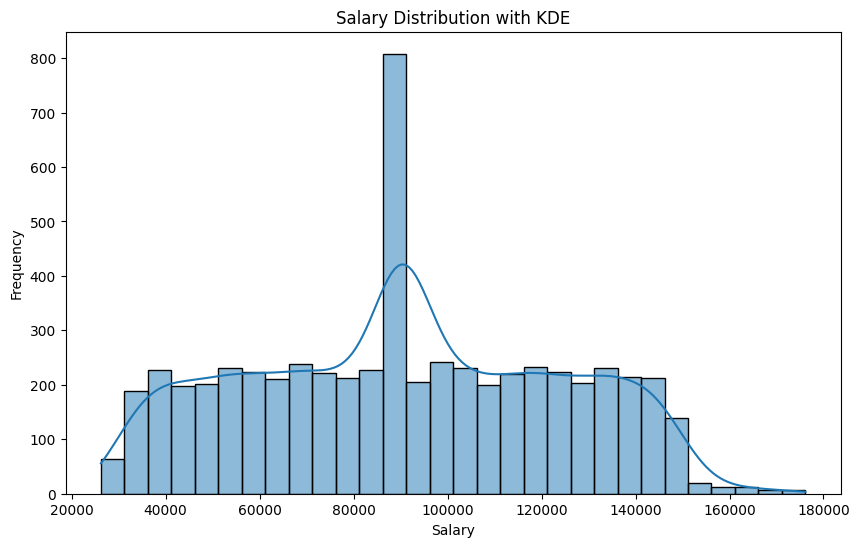

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True, bins=30)
plt.title('Salary Distribution with KDE')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


Insights:

1)The histogram with KDE plot for the Salary column shows the distribution of salary values, confirming the absence of significant outliers and highlighting the overall shape of the data.

2)The distribution appears to be fairly symmetrical and continuous, without any extreme outliers.

3)Most salaries are concentrated around the mean value (approximately 90,000).

**Removing Duplicate Id**

In [53]:
# Sort by ID and Date in descending order
df = df.sort_values(by=['Id', 'Join_Date'], ascending=[True, False])

# Drop duplicates keeping the latest date for each ID
df_latest = df.drop_duplicates(subset='Id', keep='first')

df_latest

,Id,FirstName,Age,Email,Join_Date,Salary,Department
4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin,61,nancyortega@gmail.com,2021-10-19,139842.00,Engineering
1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie,27,aliciawright@yahoo.com,2021-05-22,56616.00,Support
8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia,74,mlewis@hotmail.com,1983-09-06,62610.00,HR
3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84,gmedina@wilson-scott.com,2020-02-17,49203.00,HR
6991,003cece6-e9cb-4236-a180-1b88ed6572d4,Unknown,34,sbryant@scott.info,2022-10-11,33037.19,Sales
...,...,...,...,...,...,...,...
9559,ffdb63e3-a09b-4df3-b45a-701ad95e9e60,Kristi,57,usmith@gmail.com,2021-12-01,130590.52,Sales
6579,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria,28,cassandra78@hotmail.com,2022-02-09,95228.00,Support
6045,ffec6404-7edf-463d-8a61-909b38e9c185,Gina,86,joseph11@williams.com,2024-01-03,51202.00,Sales
1784,fff55723-981a-4646-b95c-1f33543e97d6,Jessica,48,hpope@gmail.com,2021-02-16,90443.00,Marketing


In [54]:
#Converting dataframe to a csv file
df_latest.to_csv('cleaned_dataset.csv',index=False)

In [55]:
df_latest.describe(include='object')

,Id,FirstName,Email,Join_Date,Department
count,5566,5566,5566,5566,5566
unique,5566,617,5546,2522,5
top,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Unknown,michael27@gmail.com,2022-05-11,Marketing
freq,1,605,2,9,1142


**Conclusions:**

1)**Email Validation and Correction:**

   i) Validated and corrected email formats in the Email column.

  ii) Dropped rows with NaN values in the Email column.

2)**First Name Extraction:**

  i) Extracted FirstName from the Name column, discarding noisy last name data.

  ii)Imputed NaN values in FirstName with "Unknown".

3)**Join_Date Standardization:**

 i) Standardized dates in the Join_Date column to a uniform format.

 ii) Dropped rows with NaN values in the Join_Date column.

4)**Department Name Standardization:**

 i) Standardized department names to ensure consistency.

 ii)Dropped rows with NaN values in the Department column.

5)**Age Column Imputation and Conversion:**

 i) Imputed NaN values in the Age column with the mean age.

 ii) Converted the data type of the Age column to integer.

6)**Salary Column Noise Handling:**


  i) Handled noise in the Salary column.

 ii) Imputed NaN values in the Salary column with the median salary.

 iii)Rounded Salary values to two decimal places for consistency.

**7)Removed duplicate IDs by filtering based on the latest joining dates.**


These steps ensured data quality and consistency across the DataFrame.

